# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import norm, binom
import seaborn as sns
from tqdm import tqdm

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [111]:
dist10 = norm.rvs(loc=50, scale=5, size=10, random_state=42)
dist50 = norm.rvs(loc=50, scale=5, size=50, random_state=42)
dist500 = norm.rvs(loc=50, scale=5, size=500, random_state=42)
dist5000 = norm.rvs(loc=50, scale=5, size=5000, random_state=42)

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

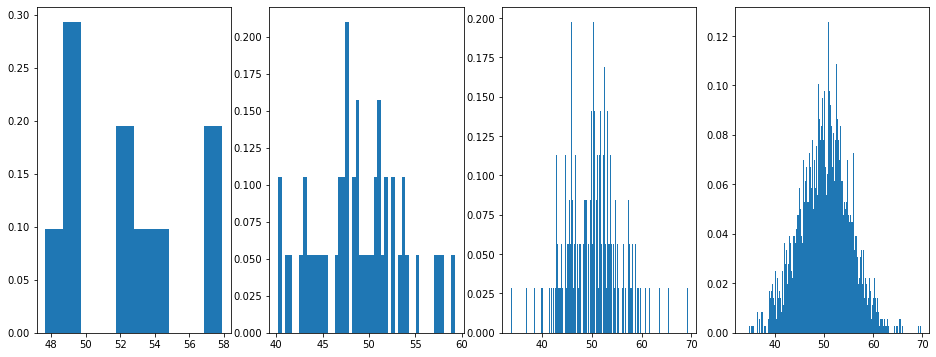

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16,6))

for data in zip(axes,[dist10, dist50, dist500, dist5000],[10,50,500,500]):
    plt.sca(data[0])
    plt.hist(x=data[1],bins=data[2],density=True)

In [0]:
"""
The theorem describes the distribution of the mean of a random sample from a population with finite variance. 
When the sample size is sufficiently large, the distribution of the means is approximately normally distributed. 
The theorem applies regardless of the shape of the population's distribution. Many common statistical procedures 
require data to be approximately normal. The central limit theorem lets you apply these useful procedures to 
populations that are strongly nonnormal. 
"""

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

pmf: [44.371, 39.15, 13.818, 2.438, 0.215, 0.008]


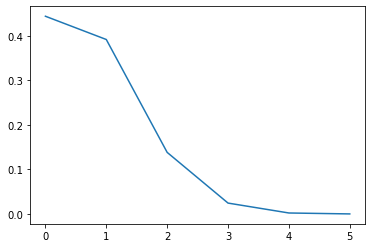

In [159]:
# 5 people watched
n=5

# 0.15 chance of success
p=0.15

dist = binom(n,p)

# run this code
x = range(n+1)

fig, ax = plt.subplots(1, 1)

# change of exactly 0, 1, 2, 3 and 5 successes:
pmf = dist.pmf(x)

plt.plot(x, dist.pmf(x))
print(f'pmf: {[round(num*100,3) for num in dist.pmf(x)]}')
plt.show()

#### Step 3: Explain what you observe from the plot above.

In [0]:
"""
In probability and statistics, a probability mass function (PMF) is a function 
that gives the probability that a discrete random variable is exactly equal to some value.
The probability mass function is often the primary means of defining a discrete probability distribution,
and such functions exist for either scalar or multivariate random variables whose domain is discrete


In this binomial distribution, we test 5 trials of people watching a Youtube video, and the chance for clicking
an add is 0.15. The plot shows the probability of success according to the number of successes.
In our case, for example, no one clicking is 44% and 3 out of 5 people clicking is 2.44%.
"""

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

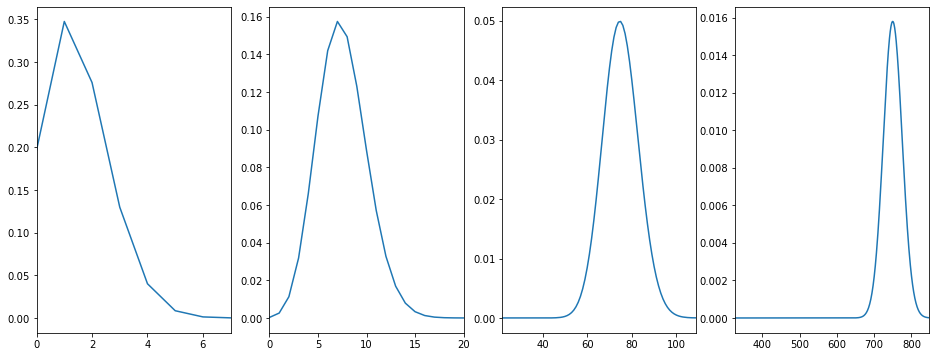

In [4]:
# 0.15 chance of success
p=0.15

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(16,6))
datas = zip(axes, [10, 50, 500, 5000])

for data in datas:
    n = data[1]
    x = np.array(range(n+1))
    pmf =binom(n,p).pmf(x)
    
    plt.sca(data[0])
    plt.plot(x, pmf)
    
    #setting a rangex for fitting data on the plots
    rangex = x[pmf > 0.00001]
    plt.xlim(left=rangex.min()/2, right=rangex.max())
    
plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [0]:
"""
As the number of Trials raises, the binomial distribution is "shifted to the right" of the graph.
That means that, even if probability is low, the more trials you do the more hard is for not having a success.
Therefore, as we raise from 10, to 50 and then 5000, a minimun number of successes starts to also get higher.
"""

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [0]:
"""
The Poisson distribution is similar to the binomial distribution because they both model counts of events.
However, within its finite observation space, the Poisson distribution places no upper bound on this count: 
a switchboard could receive an unlimited number of calls in a day and not violate Poisson distribution requirements. 
Conversely, the binomial distribution does set an upper limit on the count: 
the number of events you observe cannot be greater than the number of trials you perform.
"""

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [5]:
from scipy.stats import poisson

In [6]:
#a poisson distribution with mean 300
dist = poisson(300)

# probability of having 320 visitors in a day
print(f'p(320): {round(dist.pmf(320)*100,2)}%')

p(320): 1.16%


#### Step 3: What is the probability of getting 60 visits?

In [7]:
print(f'p(320): {dist.pmf(60)*100}%\npratically zero!')

p(320): 2.622743762294515e-62%
pratically zero!


#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [8]:
arr = [dist.pmf(x) for x in range(1001)]

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

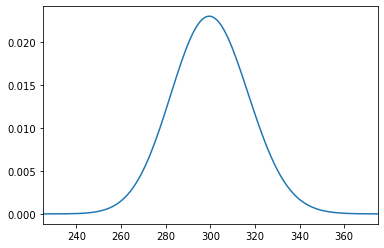

In [11]:
# run this code
plt.plot(arr)
plt.xlim(225,375)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [247]:
dist = norm(35,8)
prob30_35 = dist.cdf(35) - dist.cdf(30)
print(f'the probability that the mean delivery time today is between 30 and 35 minutes is: {round(prob30_35 *100,3)}%')

the probability that the mean delivery time today is between 30 and 35 minutes is: 23.401%


#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [251]:
mean = 115*60/200
mean

34.5

In [253]:
prob = 1-dist.cdf(34.5)
print(f'the probability that the mean delivery time today is between 30 and 35 minutes is: {round(prob *100,3)}%')

the probability that the mean delivery time today is between 30 and 35 minutes is: 52.492%


# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X â†’ N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [259]:
dist = norm(200,40)
prob = 1 - dist.cdf(300)
print(f'The probability that the monthly sales are more than 300: {round(prob *100,3)}%')

The probability that the monthly sales are more than 300: 0.621%


#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [260]:
prob = dist.cdf(240) - dist.cdf(160)
print(f'the probability that the monthly fall between 160 and 240: {round(prob *100,3)}%')

the probability that the monthly fall between 160 and 240: 68.269%


#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [261]:
prob = dist.cdf(150)
print(f'the probability that the monthly sales do not exceed 150: {round(prob *100,3)}%')

the probability that the monthly sales do not exceed 150: 10.565%


#### Step 4: Find the probability that the monthly sales exceed 3000.

In [266]:
prob = 1 - dist.cdf(3000)
print(f'the probability that the monthly sales exceed 3000: {prob*100}%')

the probability that the monthly sales exceed 3000: 0.0%


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [281]:
dist = poisson(4)
prob = dist.cdf(0)
print(f'the probability that in a particular month there is no violent robbery: {round(prob *100,3)}%')

the probability that in a particular month there is no violent robbery: 1.832%


#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [282]:
prob = dist.cdf(1)
print(f'the  probability that there are at least 1 robbery in a given month: {round(prob *100,3)}%')

the  probability that there are at least 1 robbery in a given month: 9.158%


#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [283]:
prob = dist.cdf(6) - dist.cdf(2)
print(f'the probability that  there are between 2 and 6 (inclusive) robberies in a given month: {round(prob *100,3)}%')

the probability that  there are between 2 and 6 (inclusive) robberies in a given month: 65.122%


#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [291]:
# 2 robberies in 15 days... is 4 robberies in a month?

prob = 1 - dist.cdf(4)
print(f'the probability that there are more than 2 robberies in 15 days: {round(prob *100,3)}%')

the probability that there are more than 2 robberies in 15 days: 37.116%
